In [5]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lectura de Archivos y Carga de Datos

In [2]:
folders = ('01-10-19_PT5M','02-10-19_PT5M','05-10-19_PT5M','08-10-19_PT5M')
assets = pd.read_csv('southcentral-asset.csv',sep=';')
assets.sample(5)

,ResourceGruop,Name,Nodes,Size,Tier,File
18,WebFlowersFV,WebFlowersFV,2,Standard_A1_v2,Standard,WebFlowersFVresults.json
26,WebFlowersJP,WebFlowersJP,2,Standard_A1_v2,Standard,WebFlowersJPresults.json
48,WebFlowersSZ,WebFlowersSZ,2,Standard_A1_v2,Standard,WebFlowersSZresults.json
46,WebFlowersSC,WebFlowersSC,2,Standard_A1_v2,Standard,WebFlowersSCresults.json
12,WebFlowersER,WebFlowersER,2,Standard_A1_v2,Standard,WebFlowersERresults.json


Recorrer el inventario y cargarlos datos en los arreglos respectivos

In [3]:
datosCPU={}
datosNTI={}
datosNTO={}

for i,r in assets.iterrows():
    print(r.Name)
    ultimoMin = 0
    for j in np.arange(0,len(folders)):
        with open(folders[j]+'/'+r.File, 'r') as f:
            datastore = json.load(f)
            #print('File readed:'+folders[j]+'/'+r.File)
        tempCPU = pd.DataFrame(datastore["value"][0]["metricValues"])
        tempNTI = pd.DataFrame(datastore["value"][1]["metricValues"])
        tempNTO = pd.DataFrame(datastore["value"][2]["metricValues"])
        tempMin = np.arange(ultimoMin,ultimoMin+(tempCPU.shape[0]*5),step=5)
        tempCPU['minute'] = tempMin
        tempNTI['minute'] = tempMin
        tempNTO['minute'] = tempMin
        ultimoMin = tempMin[len(tempMin)-1]+5
        #print(ultimoMin)
        tempCPU = tempCPU.dropna(axis=0,how='any')
        tempNTI = tempNTI.dropna(axis=0,how='any')
        tempNTO = tempNTO.dropna(axis=0,how='any')
        if r.Name in datosCPU:
            datosCPU[r.Name] = datosCPU[r.Name].append(tempCPU)
            datosNTI[r.Name] = datosNTI[r.Name].append(tempNTI)
            datosNTO[r.Name] = datosNTO[r.Name].append(tempNTO)
        else:
            datosCPU[r.Name] = tempCPU
            datosNTI[r.Name] = tempNTI
            datosNTO[r.Name] = tempNTO

WebFlowersPA
WebflowersIC
WebFlowersAL
WebFlowersBGSales
WebFlowersBQC
WebFlowersCA
WebFlowersCH
WebFlowersCP
WebFlowersCQ
WebFlowersDCCNM
WebFlowersDCNM
WebFlowersDPANM
WebFlowersER
WebFlowersFA
WebFlowersFD
WebFlowersFE
WebFlowersFG
WebFlowersFL
WebFlowersFV
webflowersfxsales
WebFlowersGOSALES
WebFlowersGrChia
WebFlowersHT
WebFlowersIB
WebFlowersJA
WebFlowersJN
WebFlowersJP
WebFlowersJQ
WebFlowersJU
WebFlowersLA
WebFlowersLC
WebFlowersLM
WebFlowersLogisticServices
WebFlowersLV
WebFlowersMG
WebFlowersML
WebFlowersMO
WebFlowersOL
WebFlowersPL
webflowersproductcentral
WebFlowersQA
WebFlowersQF
WebFlowersQueensSales
WebFlowersRF
WebFlowersRQ
WebFlowersSB
WebFlowersSC
WebFlowersSN
WebFlowersSZ
WebFlowersTN
WebFlowersTR
WebFlowersUB
webflowersVL


In [4]:
accumNTO={}
for i,r in assets.iterrows():
    for d in np.arange(1,11):
        temp = datosNTO[r.Name][(datosNTO[r.Name]['minute'] >= ((d-1)*1440)) & (datosNTO[r.Name]['minute'] < (d*1440))]
        sumx = temp.apply(np.sum,axis= 0)
        accumNTO[str(d)+'-'+r.Name] =pd.DataFrame(sumx[1:5])

In [5]:
tempCPU_1 = datosCPU['WebFlowersLM']
tempCPU_2 = datosCPU['WebFlowersCA']

## CPU vs Tiempo en Máximos, Promedios, Mínimos y Acumulados cada 5 Minutos

Text(0.5, 0, 'Minutos')

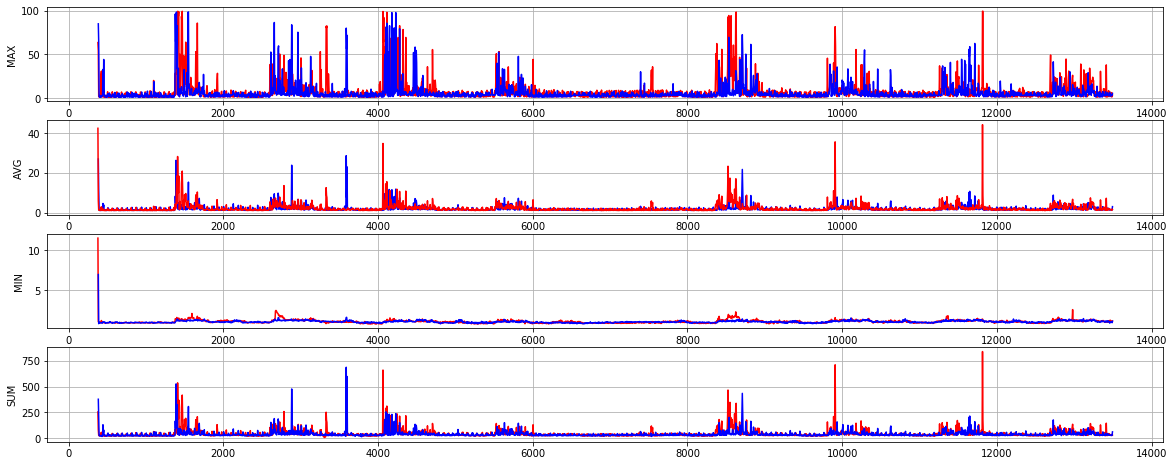

In [6]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,8))
ax1.set_ylabel('MAX')
ax1.plot(tempCPU_1['minute'], tempCPU_1['maximum'], color = 'red', label='CPU1')
ax1.plot(tempCPU_2['minute'], tempCPU_2['maximum'], color = 'blue', label='CPU2')
ax1.grid(True)
ax2.set_ylabel('AVG')
ax2.plot(tempCPU_2['minute'], tempCPU_2['average'], color = 'blue', label='CPU2')
ax2.plot(tempCPU_1['minute'], tempCPU_1['average'], color = 'red', label='CPU1')
ax2.grid(True)
ax3.set_ylabel('MIN')
ax3.plot(tempCPU_1['minute'], tempCPU_1['minimum'], color = 'red', label='CPU1')
ax3.plot(tempCPU_2['minute'], tempCPU_2['minimum'], color = 'blue', label='CPU2')
ax3.grid(True)
ax4.set_ylabel('SUM')
ax4.plot(tempCPU_1['minute'], tempCPU_1['total'], color = 'red', label='CPU1')
ax4.plot(tempCPU_2['minute'], tempCPU_2['total'], color = 'blue', label='CPU2')
ax4.grid(True)
ax3.set_xlabel('Minutos')

{'whiskers': [<matplotlib.lines.Line2D at 0x2a675a67f48>,
 'caps': [<matplotlib.lines.Line2D at 0x2a675a6dc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a675a17d88>,
 'medians': [<matplotlib.lines.Line2D at 0x2a675a70fc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a675a706c8>,
 'means': []}

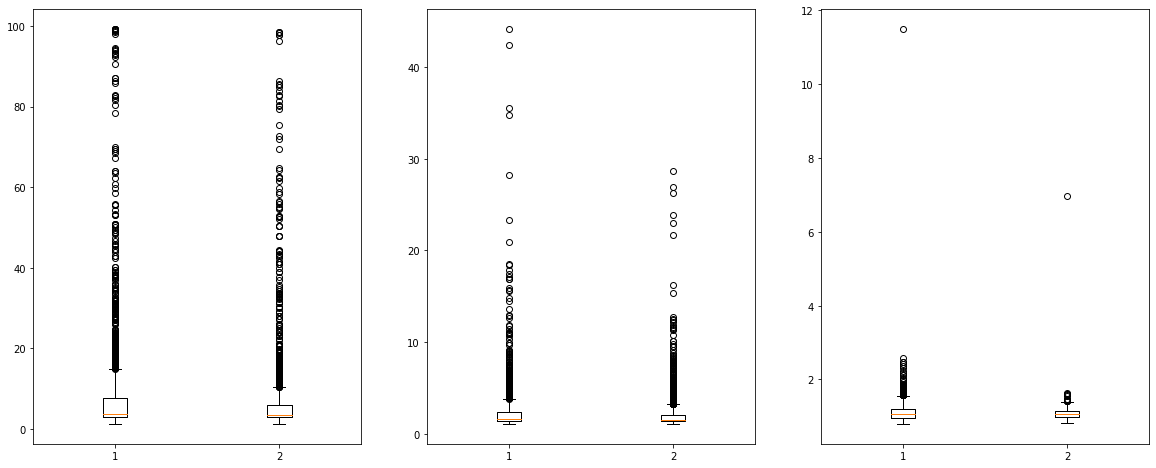

In [7]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,8))
ax1.boxplot([tempCPU_1['maximum'],tempCPU_2['maximum']])
ax2.boxplot([tempCPU_1['average'],tempCPU_2['average']])
ax3.boxplot([tempCPU_1['minimum'],tempCPU_2['minimum']])

## Entrada de RED vs Tiempo en Máximos, Promedios y Mínimos cada 5 Minutos

In [8]:
tempNTI_1 = datosNTI['WebFlowersLM']
tempNTI_2 = datosNTI['WebFlowersCA']

Text(0.5, 0, 'Minutos')

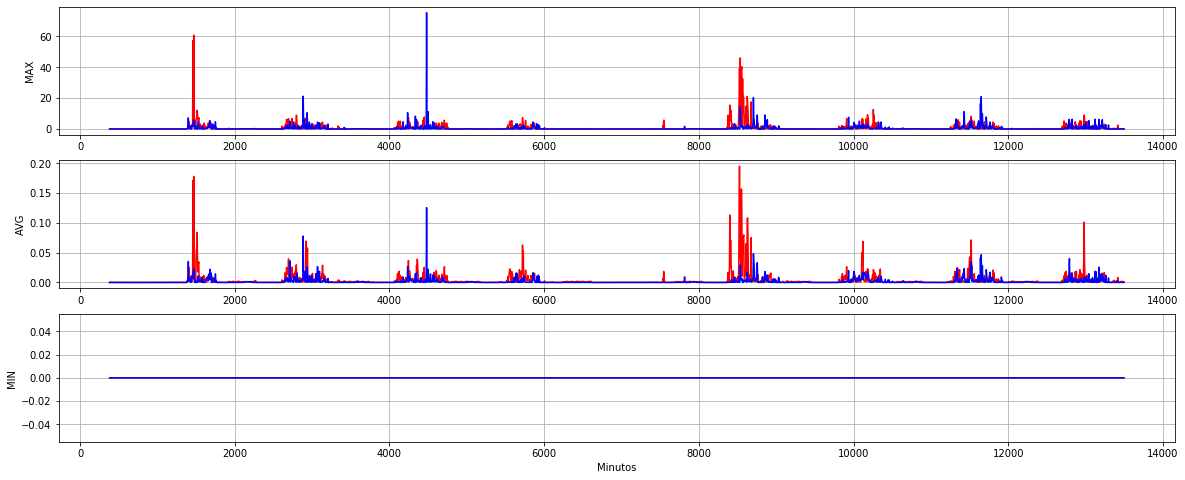

In [9]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,8))
ax1.set_ylabel('MAX')
ax1.plot(tempNTI_1['minute'], tempNTI_1['maximum']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax1.plot(tempNTI_2['minute'], tempNTI_2['maximum']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax1.grid(True)
ax2.set_ylabel('AVG')
ax2.plot(tempNTI_1['minute'], tempNTI_1['average']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax2.plot(tempNTI_2['minute'], tempNTI_2['average']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax2.grid(True)
ax3.set_ylabel('MIN')
ax3.plot(tempNTI_1['minute'], tempNTI_1['minimum']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax3.plot(tempNTI_2['minute'], tempNTI_2['minimum']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax3.grid(True)
ax3.set_xlabel('Minutos')

## Salida de RED vs Tiempo en Máximos, Promedios y Mínimos cada 5 Minutos

In [10]:
tempNTO_1 = datosNTO['WebFlowersLM']
tempNTO_2 = datosNTO['WebFlowersCA']

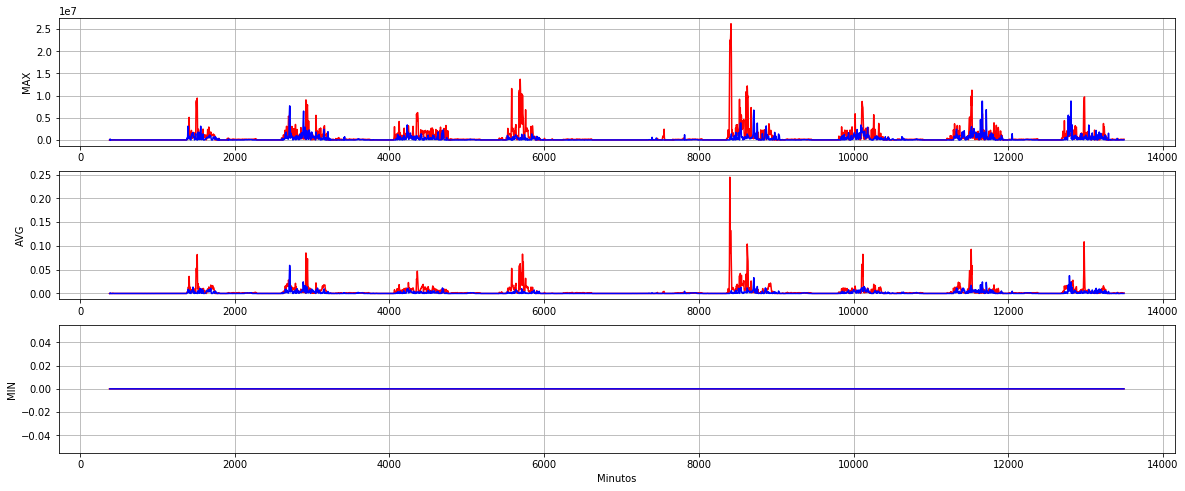

In [11]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,8))
ax1.set_ylabel('MAX')
ax1.plot(tempNTO_1['minute'], tempNTO_1['maximum'], color = 'red', label='CPU1')
ax1.plot(tempNTO_2['minute'], tempNTO_2['maximum'], color = 'blue', label='CPU2')
ax1.grid(True)
ax2.set_ylabel('AVG')
ax2.plot(tempNTO_1['minute'], tempNTO_1['average']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax2.plot(tempNTO_2['minute'], tempNTO_2['average']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax2.grid(True)
ax3.set_ylabel('MIN')
ax3.plot(tempNTO_1['minute'], tempNTO_1['minimum']/(math.pow(1024,2)), color = 'red', label='CPU1')
ax3.plot(tempNTO_2['minute'], tempNTO_2['minimum']/(math.pow(1024,2)), color = 'blue', label='CPU2')
ax3.grid(True)
ax3.set_xlabel('Minutos');

In [74]:
def obtenerDatosAcumulados(nombreEmpresa):
    total = np.array([[1,accumNTO['1-'+nombreEmpresa].transpose()['total'][0]]])
    total = np.append(total, [[2,accumNTO['2-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[3,accumNTO['3-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[4,accumNTO['4-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[5,accumNTO['5-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[6,accumNTO['6-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[7,accumNTO['7-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[8,accumNTO['8-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[9,accumNTO['9-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    total = np.append(total, [[10,accumNTO['10-'+nombreEmpresa].transpose()['total'][0]]],axis=0)
    acumm = pd.DataFrame(total,columns=['dia','acumulado'])
    acumm.dropna(axis=0,how='any')
    return acumm

In [75]:
acumulados = {}

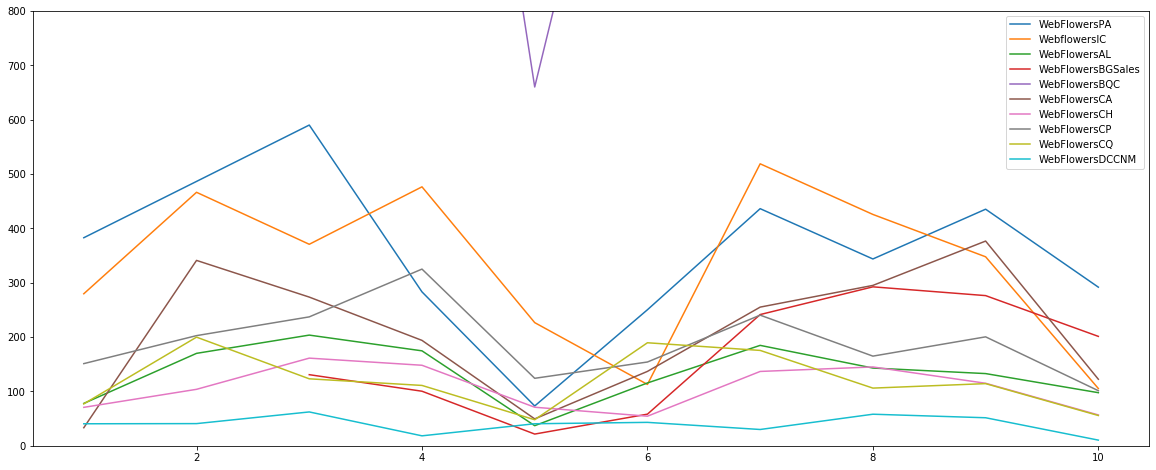

In [76]:
plt.figure(figsize=(20,8))
for i in np.arange(0,10):
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    acumulados[company]=Acumm
    plt.plot(Acumm['dia'], Acumm['acumulado']/(math.pow(1024,2)), label=company)
plt.ylim(0,800)
plt.legend();

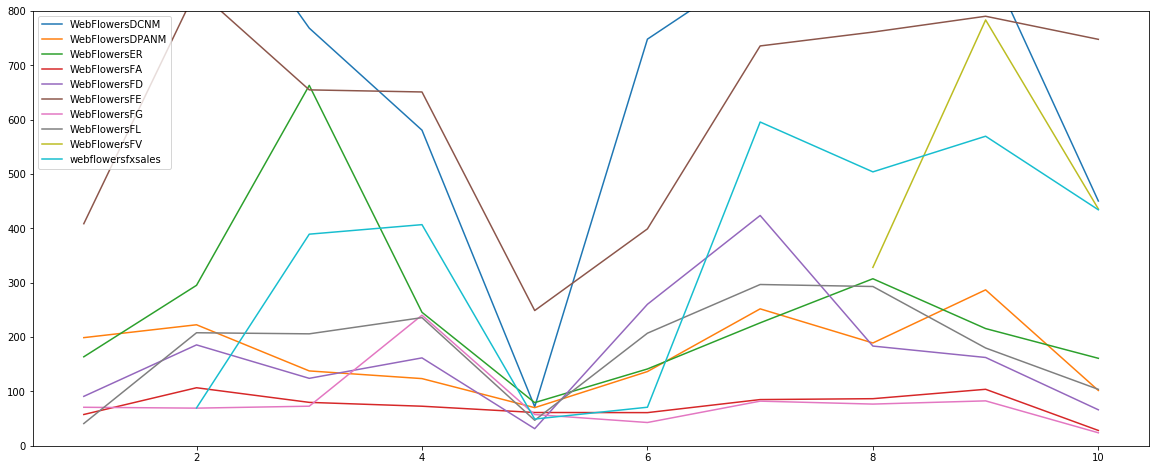

In [77]:
plt.figure(figsize=(20,8))
for i in np.arange(10,20):
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    plt.plot(Acumm['dia'], Acumm['acumulado']/(math.pow(1024,2)), label=company)
plt.ylim(0,800)
plt.legend();

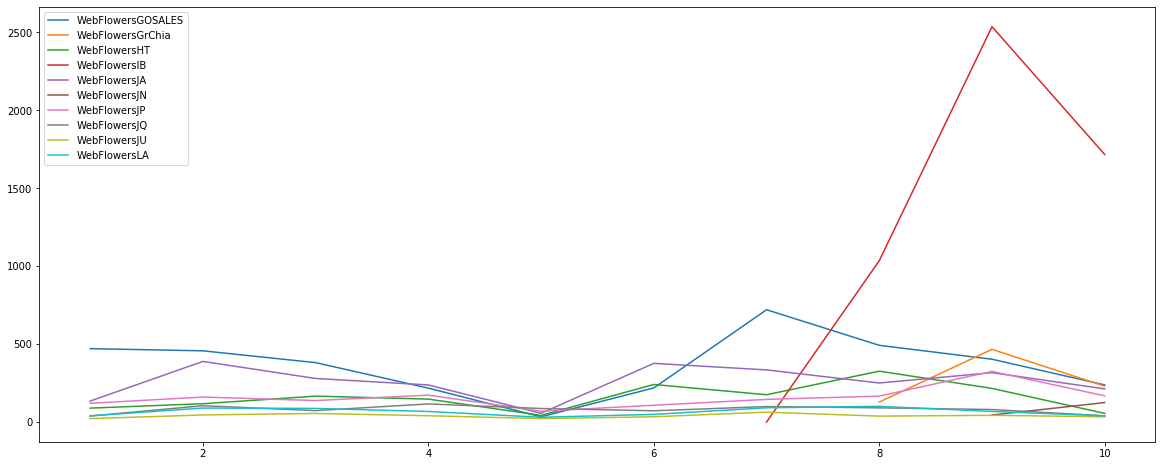

In [78]:
plt.figure(figsize=(20,8))
for i in np.arange(20,30):
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    acumulados[company]=Acumm
    plt.plot(Acumm['dia'], Acumm['acumulado']/(math.pow(1024,2)), label=company)
#plt.ylim(0,800)
plt.legend();

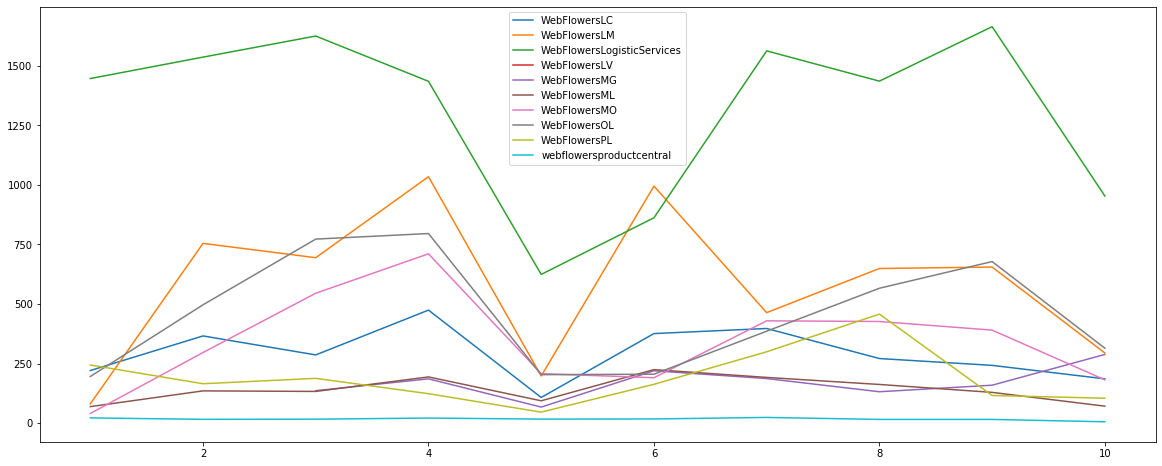

In [79]:
plt.figure(figsize=(20,8))
for i in np.arange(30,40):
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    acumulados[company]=Acumm
    plt.plot(Acumm['dia'], Acumm['acumulado']/(math.pow(1024,2)), label=company)
#plt.ylim(0,800)
plt.legend();

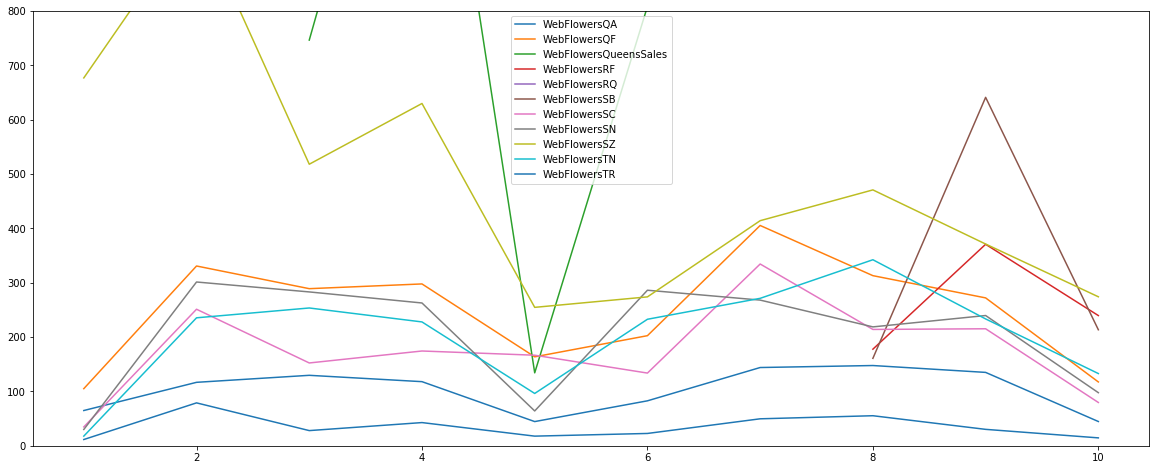

In [80]:
plt.figure(figsize=(20,8))
for i in np.arange(40,51):
    company = assets.Name[i]
    Acumm = obtenerDatosAcumulados(company)
    acumulados[company]=Acumm
    plt.plot(Acumm['dia'], Acumm['acumulado']/(math.pow(1024,2)), label=company)
plt.ylim(0,800)
plt.legend();

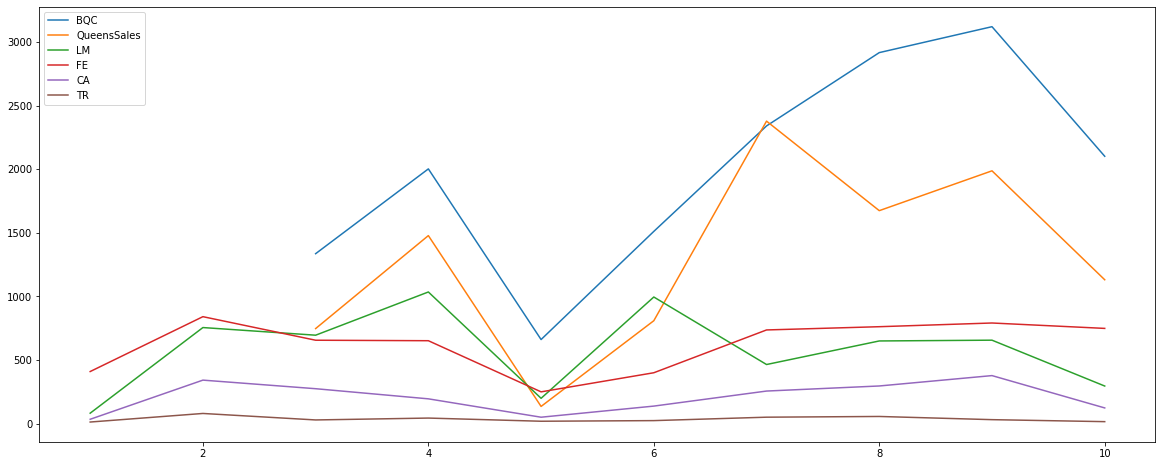

In [21]:
Acumm1=obtenerDatosAcumulados('WebFlowersLM')
Acumm2=obtenerDatosAcumulados('WebFlowersBQC')
Acumm3=obtenerDatosAcumulados('WebFlowersQueensSales')
Acumm4=obtenerDatosAcumulados('WebFlowersCA')
Acumm5=obtenerDatosAcumulados('WebFlowersTR')
Acumm6=obtenerDatosAcumulados('WebFlowersFE')
plt.figure(figsize=(20,8))

plt.plot(Acumm2['dia'], Acumm2['acumulado']/(math.pow(1024,2)), label='BQC')
plt.plot(Acumm3['dia'], Acumm3['acumulado']/(math.pow(1024,2)), label='QueensSales')

plt.plot(Acumm1['dia'], Acumm1['acumulado']/(math.pow(1024,2)), label='LM')
plt.plot(Acumm6['dia'], Acumm6['acumulado']/(math.pow(1024,2)), label='FE')

plt.plot(Acumm4['dia'], Acumm4['acumulado']/(math.pow(1024,2)), label='CA')
plt.plot(Acumm5['dia'], Acumm5['acumulado']/(math.pow(1024,2)), label='TR')
#plt.ylim(0,800)
plt.legend();

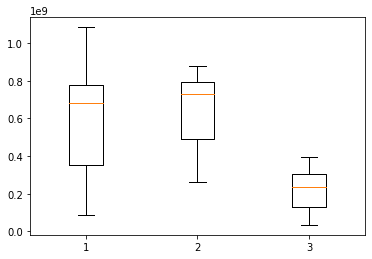

In [22]:
plt.boxplot([Acumm1['acumulado'],Acumm6['acumulado'],Acumm4['acumulado']]);

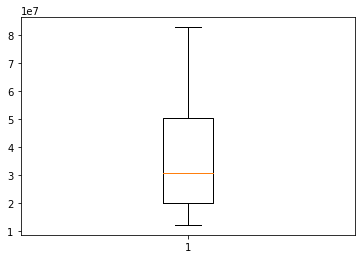

In [23]:
plt.boxplot([Acumm5['acumulado']]);

In [17]:
Acumm2

,dia,acumulado
0,1.0,NaN
1,2.0,NaN
2,3.0,1.400059e+09
3,4.0,2.099023e+09
4,5.0,6.921590e+08
5,6.0,1.583752e+09
6,7.0,2.453262e+09
7,8.0,3.057712e+09
8,9.0,3.271425e+09
9,10.0,2.203133e+09


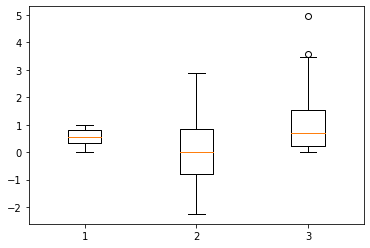

In [6]:
a = [ np.random.uniform(size=100),np.random.normal(size=100),np.random.exponential(size=100)]
plt.boxplot(a);

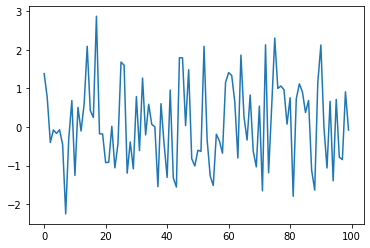

In [7]:
#plt.plot(a[0])
plt.plot(a[1])
#plt.plot(a[2]);

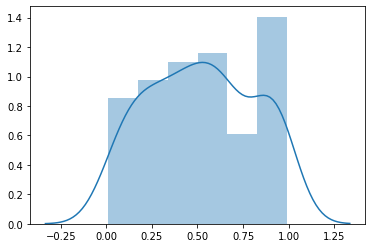

In [24]:
sns.distplot(a[0]);

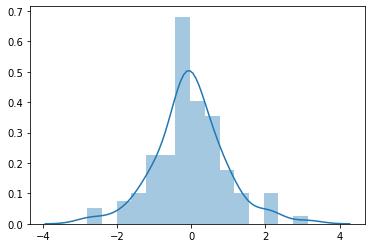

In [25]:
sns.distplot(a[1]);

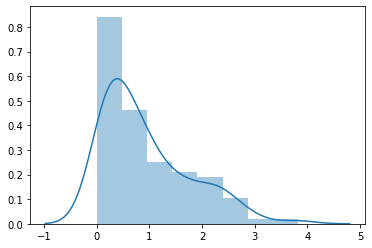

In [26]:
sns.distplot(a[2]);

## Pruebas de Normalidad

In [36]:
acumulados['WebFlowersLM'].describe()

,dia,acumulado
count,10.00000,1.000000e+01
mean,5.50000,6.101644e+08
std,3.02765,3.355222e+08
min,1.00000,8.507829e+07
25%,3.25000,3.532648e+08
50%,5.50000,6.837320e+08
75%,7.75000,7.752559e+08
max,10.00000,1.084322e+09
